In [22]:
import yfinance as yf
import pandas as pd

## Get data with ticker 

In [6]:
Ticker_Name = '^GSPC'
sp500 = yf.Ticker(Ticker_Name)
sp500_df = sp500.history(period="max")
del sp500_df['Dividends']
del sp500_df['Stock Splits']



## Ploting and info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 5620.85,
 'open': 5637.77,
 'dayLow': 5560.95,
 'dayHigh': 5643.22,
 'regularMarketPreviousClose': 5620.85,
 'regularMarketOpen': 5637.77,
 'regularMarketDayLow': 5560.95,
 'regularMarketDayHigh': 5643.22,
 'volume': 2194647000,
 'regularMarketVolume': 2194647000,
 'averageVolume': 3845202741,
 'averageVolume10days': 3433956000,
 'averageDailyVolume10Day': 3433956000,
 'bid': 5524.29,
 'ask': 5629.24,
 'fiftyTwoWeekLow': 4103.78,
 'fiftyTwoWeekHigh': 5669.67,
 'fiftyDayAverage': 5479.491,
 'twoHundredDayAverage': 5084.828,
 'currency': 'USD',
 'exchange': 'SNP',
 'quoteType': 'INDEX',
 'symbol': '^GSPC',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500',
 'longName': 'S&P 500',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': '8ffd55d1-3d1d-3733-a480-56768bc708e6',
 'messageBoardId': 'finmb_INDEXGSPC',
 'gmtOffSetMilliseconds': -14400000,
 'trailingPegRatio': N

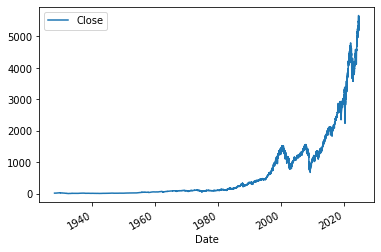

In [17]:
sp500_df.plot.line(y='Close')
sp500.info

## Goal for Model
The goal for this particular model is just to predict whether the stock will go up or down the next day, not the exact price of the stock.

We will do this by determining if tomorrows closing price is bigger that todays closing price

In [35]:
sp500_df['Tomorrow'] = sp500_df['Close'].shift(-1)
sp500_df['Target'] = (sp500_df['Tomorrow'] > sp500_df['Close']).astype(int)
display(sp500_df)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-08-16 00:00:00-04:00,5530.500000,5561.979980,5525.169922,5554.250000,3357690000,5608.250000,1
2024-08-19 00:00:00-04:00,5557.229980,5608.299805,5550.740234,5608.250000,3222050000,5597.120117,0
2024-08-20 00:00:00-04:00,5602.879883,5620.509766,5585.500000,5597.120117,2994420000,5620.850098,1


Remove data that came before 1990